In [1]:
import pandas as pd

df = pd.DataFrame(
    {
        "EID": [101, 102, 103, 104],
        
        "Name": ["Ram", "SHyam", "Hari", "Sita"],
        "Level": ["Junior", "Senior", "Mid", "Junior"],
    }
)

# df.info()
df.dtypes

EID      int64
Name       str
Level      str
dtype: object

In [2]:
df["Level"] = df["Level"].astype("category")
df.dtypes

EID         int64
Name          str
Level    category
dtype: object

In [3]:
df['Level'] = df['Level'].cat.rename_categories({
    'Junior':'Jr',
    "Senior":"Sr",
})

df.head()

,EID,Name,Level
0,101,Ram,Jr
1,102,SHyam,Sr
2,103,Hari,Mid
3,104,Sita,Jr


In [4]:
df['Level_Code'] = df['Level'].cat.codes
print(df.head())

# this is called level encoding.

   EID   Name Level  Level_Code
0  101    Ram    Jr           0
1  102  SHyam    Sr           2
2  103   Hari   Mid           1
3  104   Sita    Jr           0


In [6]:
# One hot encoding.

encoded = pd.get_dummies(df["Level"], prefix="Lev")
final_df = pd.concat(objs=[df, encoded], axis=1)
print(final_df)

   EID   Name Level  Level_Code  Lev_Jr  Lev_Mid  Lev_Sr
0  101    Ram    Jr           0    True    False   False
1  102  SHyam    Sr           2   False    False    True
2  103   Hari   Mid           1   False     True   False
3  104   Sita    Jr           0    True    False   False


In [8]:
import pandas as pd

df = pd.DataFrame(
    {
        "Date": ["2025-01-23", "2025-11-23", "2025-01-24", "2025-01-27"],
        "Sales": [100, 103, 105, 106],
    }
)

print(df.head())

         Date  Sales
0  2025-01-23    100
1  2025-11-23    103
2  2025-01-24    105
3  2025-01-27    106


In [9]:
df.dtypes

Date       str
Sales    int64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes


Date     datetime64[us]
Sales             int64
dtype: object

In [12]:
df.head()

,Date,Sales
0,2025-01-23,100
1,2025-11-23,103
2,2025-01-24,105
3,2025-01-27,106


In [14]:
df = df.set_index('Date')
df.head()

,Sales
Date,
2025-01-23,100
2025-11-23,103
2025-01-24,105
2025-01-27,106


In [16]:
df["Year"] = df.index.year
df["Month"] = df.index.month
df['Day'] = df.index.day
df['Day_Name'] = df.index.day_name()
df['Month_Name'] = df.index.month_name()
df.head()

,Sales,Year,Month,Day,Day_Name,Month_Name
Date,,,,,,
2025-01-23,100,2025,1,23,Thursday,January
2025-11-23,103,2025,11,23,Sunday,November
2025-01-24,105,2025,1,24,Friday,January
2025-01-27,106,2025,1,27,Monday,January


In [20]:
df.loc['2025']

,Sales,Year,Month,Day,Day_Name,Month_Name
Date,,,,,,
2025-01-23,100,2025,1,23,Thursday,January
2025-11-23,103,2025,11,23,Sunday,November
2025-01-24,105,2025,1,24,Friday,January
2025-01-27,106,2025,1,27,Monday,January


<Axes: xlabel='Day_Name'>

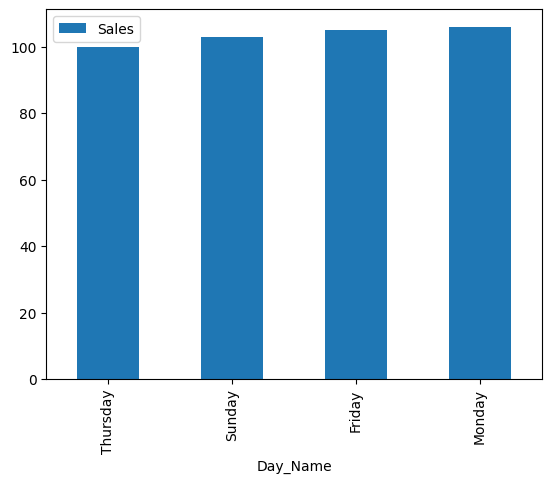

In [21]:
df.plot.bar(x="Day_Name",y="Sales")